# Model

### Clustering 

In [30]:
clustering_dataset = master_dataset. copy () 
clustering_dataset = clustering_dataset.loc[:, [ 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Veh Class', 'Air Pollution Score', 'City MPG' , 'Hwy MPG' , 'Cmb MPG' ,'Greenhouse Gas Score' , 'SmartWay' , 'Year' ]]

# importing one hot encoder, label encoder, standard scaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler 

# creating one hot encoder object 
onehotencoder = OneHotEncoder () 
labelencoder = LabelEncoder ( ) 
standardscaler = StandardScaler( )

# label encode the categorical features
clustering_dataset.loc[:, 'Trans'] = labelencoder.fit_transform(clustering_dataset.loc[ :, 'Trans' ]) 
clustering_dataset.loc[:, 'SmartWay' ] = labelencoder.fit_transform(clustering_dataset.loc[ :, 'SmartWay' ]) 
clustering_dataset.loc[:, 'Drive'] = labelencoder.fit_transform(clustering_dataset.loc[ :, 'Drive' ]) 
clustering_dataset.loc[:, 'Fuel'] = labelencoder. fit_transform(clustering_dataset.loc[ :, 'Fuel' ]) 
clustering_dataset.loc[:, 'Veh Class'] = labelencoder.fit_transform(clustering_dataset.loc[:, 'Veh Class' ])

# Scaling the data
clustering_dataset = standardscaler.fit_transform(clustering_dataset)

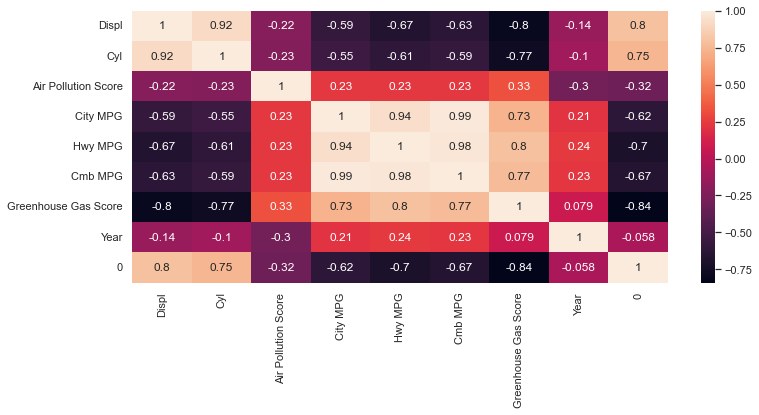

The clustered category has the most correlation with displacement, cylinders, and Green House Gas Score
-----------------------------------------
Inertia: 	 219703.71
-----------------------------------------

Average displacement in clusters: 
Cluster 1: 	 2.06
Cluster 2: 	 2.81
Cluster 3: 	 4.95
-----------------------------------------

Average cylinders in clusters: 
Cluster 1: 	 4.18
Cluster 2: 	 5.11
Cluster 3: 	 7.93
-----------------------------------------

Average Green House Gas Score in clusters: 
Cluster 1: 	 7.47
Cluster 2: 	 5.12
Cluster 3: 	 2.86


In [34]:
# K-Means clstering on the dataset
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters = 3, init= 'k-means++' ,n_init=10, random_state = 42) 
kmeans.fit(clustering_dataset)

# Predict the data on the same dataset
y_pred = kmeans.predict(clustering_dataset) 
clustering_dataset_cluster = pd.concat([pd.DataFrame(clustering_dataset), pd.DataFrame(y_pred)], axis = 1)

# Add the predicted data to the original dataset
kmeans_out_dataset = master_dataset.copy( ) 
kmeans_out_dataset = pd.concat([kmeans_out_dataset, pd.DataFrame(y_pred) ], axis = 1)

# Results

# Visualize the correlation on the clusters by various features
sns.set(rc = {'figure.figsize' : (12, 5) }) 
sns.heatmap(kmeans_out_dataset. corr( ), annot=True)
plt.show()

# Printing relevant data
print('The clustered category has the most correlation with displacement, cylinders, and Green House Gas Score')
print('-----------------------------------------')

print('Inertia: \t', round(kmeans.inertia_,2)) 
print('-----------------------------------------')
print('') 
print('Average displacement in clusters: ') 
print('Cluster 1: \t', round(np.mean (kmeans_out_dataset[kmeans_out_dataset.loc[ :,0] == 0].iloc[ :,1]),2)) 
print('Cluster 2: \t', round(np.mean(kmeans_out_dataset[kmeans_out_dataset.loc[ :,0] == 1].iloc[ : , 1]),2)) 
print('Cluster 3: \t', round(np.mean(kmeans_out_dataset[kmeans_out_dataset. loc[ : ,0] == 2]. iloc[: , 1]),2)) 
print('-----------------------------------------')
print( '') 
print('Average cylinders in clusters: ') 
print('Cluster 1: \t', round(np.mean (kmeans_out_dataset[kmeans_out_dataset. loc[ : ,0] == 0].iloc[ :,2]),2)) 
print('Cluster 2: \t', round(np.mean(kmeans_out_dataset[kmeans_out_dataset. loc[ : ,0] == 1].iloc[ :,2]),2)) 
print('Cluster 3: \t', round(np.mean (kmeans_out_dataset[kmeans_out_dataset. loc[ : , 0] == 2]. iloc[ : ,2]),2))
print('-----------------------------------------')
print('') 
print('Average Green House Gas Score in clusters: ') 
print('Cluster 1: \t', round(np.mean (kmeans_out_dataset[kmeans_out_dataset.loc[ :,0] == 0].iloc[ :,13]),2)) 
print('Cluster 2: \t', round(np.mean(kmeans_out_dataset[kmeans_out_dataset.loc[ :,0] == 1].iloc[ : , 13]),2)) 
print('Cluster 3: \t', round(np.mean(kmeans_out_dataset[kmeans_out_dataset. loc[ : ,0] == 2].iloc[: , 13]),2))

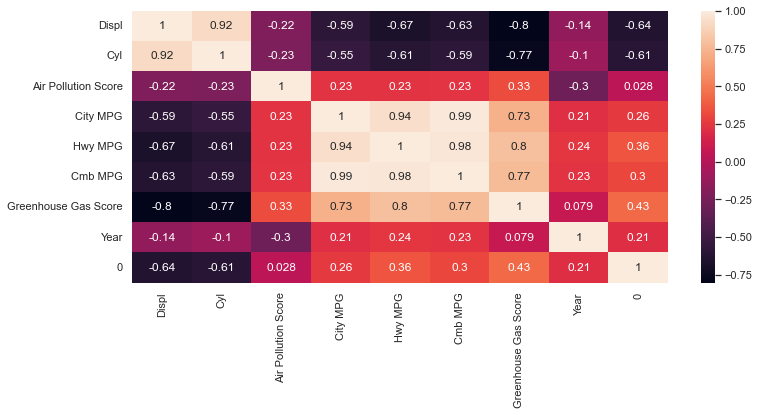

The clustered category has the most correlation with displacement, cylinders, and Green House Gas Score
-----------------------------------------
Inertia: 	 216522.11
-----------------------------------------

Average displacement in clusters: 
Cluster 1: 	 4.95
Cluster 2: 	 2.06
Cluster 3: 	 2.81
-----------------------------------------

Average cylinders in clusters:
Cluster 1: 	 7.93
Cluster 2: 	 4.18
Cluster 2: 	 5.11
-----------------------------------------

Average cylinders in clusters:
Cluster 1: 	 2.86
Cluster 2: 	 7.47
Cluster 2: 	 5.12


In [40]:
# Feature selection using PCA 
from sklearn.decomposition import PCA

# fit and transform PCA 
pca= PCA(n_components=10) 
pca.fit(clustering_dataset) 
clustering_dataset_pca = pd.DataFrame(pca.transform(clustering_dataset))

# Training the model
kmeans_pca = KMeans(n_clusters = 3, init='k-means++',n_init=10, random_state =42) 
kmeans_pca.fit(clustering_dataset_pca) 

# Predict the data on the same dataset
y_pred_pca = kmeans_pca.predict(clustering_dataset_pca) 
clustering_dataset_cluster_pca = pd.concat ([pd.DataFrame(clustering_dataset_pca), pd.DataFrame(y_pred_pca)], axis = 1)

# Add the predicted data to the original dataset
kmeans_out_dataset_pca = master_dataset.copy( ) 
kmeans_out_dataset_pca= pd.concat([kmeans_out_dataset_pca,pd.DataFrame (y_pred_pca)], axis = 1)

sns. set(rc = {'figure.figsize' : (12,5) }) 
sns. heatmap (kmeans_out_dataset_pca. corr(), annot=True)
plt.show()

# Printing relevant data
print('The clustered category has the most correlation with displacement, cylinders, and Green House Gas Score')
print('-----------------------------------------')

# Printing relevant data
print('Inertia: \t', round(kmeans_pca.inertia_,2)) 
print('-----------------------------------------')
print('') 
print('Average displacement in clusters: ') 
print('Cluster 1: \t', round(np.mean(kmeans_out_dataset_pca[kmeans_out_dataset_pca.loc[: ,0]== 0].iloc[:, 1]),2)) 
print('Cluster 2: \t', round(np.mean(kmeans_out_dataset_pca[kmeans_out_dataset_pca.loc[ : ,0] == 1].iloc[ : ,1]),2))
print('Cluster 3: \t', round(np.mean(kmeans_out_dataset_pca[kmeans_out_dataset_pca.loc[:,0] == 2]. iloc[ :, 1]),2)) 
print('-----------------------------------------')
print('') 
print( 'Average cylinders in clusters:') 
print('Cluster 1: \t', round(np.mean(kmeans_out_dataset_pca[kmeans_out_dataset_pca.loc[:,0] == 0]. iloc[ :,2]),2)) 
print('Cluster 2: \t', round(np.mean (kmeans_out_dataset_pca[kmeans_out_dataset_pca.loc[: ,0] == 1]. iloc[ : ,2]),2))
print('Cluster 2: \t', round(np.mean (kmeans_out_dataset_pca[kmeans_out_dataset_pca.loc[: ,0] == 2]. iloc[ : ,2]),2)) 
print('-----------------------------------------')
print('') 
print( 'Average cylinders in clusters:') 
print('Cluster 1: \t', round(np.mean(kmeans_out_dataset_pca[kmeans_out_dataset_pca.loc[:,0] == 0]. iloc[ :,13]),2)) 
print('Cluster 2: \t', round(np.mean (kmeans_out_dataset_pca[kmeans_out_dataset_pca.loc[: ,0] == 1]. iloc[ : ,13]),2))
print('Cluster 2: \t', round(np.mean (kmeans_out_dataset_pca[kmeans_out_dataset_pca.loc[: ,0] == 2]. iloc[ : ,13]),2)) 




In [41]:
kmeans_out_dataset_pca.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Stnd,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Year,0
0,ACURA MDX,3.7,6.0,Auto-S5,4WD,Gasoline,U2,8HNXT03.7PKR,SUV,7.0,15.0,20.0,17.0,4.0,No,2008,0
1,ACURA MDX,3.7,6.0,Auto-S5,4WD,Gasoline,B5,8HNXT03.7PKR,SUV,6.0,15.0,20.0,17.0,4.0,No,2008,0
2,ACURA RDX,2.3,4.0,Auto-S5,4WD,Gasoline,U2,8HNXT02.3DKR,SUV,7.0,17.0,22.0,19.0,5.0,No,2008,2
3,ACURA RDX,2.3,4.0,Auto-S5,4WD,Gasoline,B5,8HNXT02.3DKR,SUV,6.0,17.0,22.0,19.0,5.0,No,2008,2
4,ACURA RL,3.5,6.0,Auto-S5,4WD,Gasoline,U2,8HNXV03.5HKR,midsize car,7.0,16.0,24.0,19.0,5.0,No,2008,2


## Classification

Build a Classification model to predict the SmartWay of a car.

In [42]:
classification_dataset = master_dataset. copy() 
classification_dataset = classification_dataset. loc[:, [ 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Veh Class','Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG','Greenhouse Gas Score', 'SmartWay' , 'Year' ]]

# importing one hot encoder 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

# creating one hot encoder object 
onehotencoder = OneHotEncoder () 
labelencoder = LabelEncoder () 
standardscaler = StandardScaler( )

# Apply label encoder to features Trans and SmartWay
classification_dataset.loc[ :, 'Trans'] = labelencoder.fit_transform(classification_dataset. loc[ : , 'Trans' ]) 
classification_dataset.loc[ :, 'SmartWay'] = labelencoder.fit_transform(classification_dataset. loc[ : , 'SmartWay' ])
classification_dataset.loc[ :, 'Drive'] = labelencoder.fit_transform(classification_dataset. loc[ : , 'Drive' ])
classification_dataset.loc[ :, 'Fuel'] = labelencoder.fit_transform(classification_dataset. loc[ : , 'Fuel' ])
classification_dataset.loc[ :, 'Veh Class'] = labelencoder.fit_transform(classification_dataset. loc[ : , 'Veh Class' ])

In [43]:
# Divide dependent variable and independent variables 
y = classification_dataset.loc[:, 'SmartWay' ] 
X = classification_dataset.drop('SmartWay',axis = 1) 
y = labelencoder.fit_transform(y)

In [44]:
# Balancing the dataset 
from imblearn.over_sampling import SMOTE 
classification_dataset_balanced = master_dataset. copy()

oversample = SMOTE()
X, y = oversample.fit_resample(X,y)
pd.DataFrame(y).value_counts()

0    20534
1    20534
2    20534
dtype: int64

In [45]:
# Split the dataset to train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [46]:
# Grid Search for hyper parameter tuning
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.model_selection import GridSearchCV 
def classification_eval (algorithm, grid_params, X_train, X_test, y_train, y_test) : 
    model = GridSearchCV(algorithm, grid_params, n_jobs = - 1, cv = 5, verbose = 1) 
    model. fit(X_train, y_train) 
    y_pred = model. predict (X_test) 
    print('confusion_matrix /t', confusion_matrix(y_pred,y_test) ) 
    print("accuracy_score \t", accuracy_score(y_test, y_pred) ) 
    print("Grid Search Best Score: \t", model.best_score_) 
    print("Grid Search Best Params: \t", model.best_params_) 
    return model


### KNN

In [47]:
# Classification using KNN
from sklearn.neighbors import KNeighborsClassifier 
grid_params = {'n_neighbors' : [5,10], 'p':[1,2], 'metric' : [ 'minkowski' ]}

classification_eval(KNeighborsClassifier(),grid_params,X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
confusion_matrix /t [[5194    0   32]
 [   0 4938   19]
 [   0  200 5018]]
accuracy_score 	 0.9837023569898059
Grid Search Best Score: 	 0.9819051905422429
Grid Search Best Params: 	 {'metric': 'minkowski', 'n_neighbors': 5, 'p': 1}


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski'], 'n_neighbors': [5, 10],
                         'p': [1, 2]},
             verbose=1)

### SVC

In [48]:
# Classification using SVC
from sklearn.svm import SVC 
grid_params = {'C': [0.5,1], 'kernel': ['rbf' ], 'gamma' : [ 'scale']} 

classification_eval(SVC(), grid_params, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
confusion_matrix /t [[3977    0  341]
 [   0 4334  580]
 [1217  804 4148]]
accuracy_score 	 0.8089734432829037
Grid Search Best Score: 	 0.801367978953197
Grid Search Best Params: 	 {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.5, 1], 'gamma': ['scale'], 'kernel': ['rbf']},
             verbose=1)

### Decision Tree

In [29]:
# Classification using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 
grid_params = {'max_depth' : [1,5,10], 'min_samples_leaf' : [1,5,10]} 

classification_eval(DecisionTreeClassifier(), grid_params, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
confusion_matrix /t [[2820  685 1275]
 [ 454 2671  848]
 [1843 1791 3014]]
accuracy_score 	 0.5522368677358613
Grid Search Best Score: 	 0.5434515951169991
Grid Search Best Params: 	 {'max_depth': 5, 'min_samples_leaf': 1}


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10],
                         'min_samples_leaf': [1, 5, 10]},
             verbose=1)

### Random Forest

In [30]:
# Classification using Random Forest
from sklearn. ensemble import RandomForestClassifier 
grid_params = {'n_estimators' : [10,50, 100], 'max_depth' : [1,5,10], 'min_samples_leaf' : [1,5,10]} 

classification_eval(RandomForestClassifier(), grid_params, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
confusion_matrix /t [[2666  613 1264]
 [ 608 2743  859]
 [1843 1791 3014]]
accuracy_score 	 0.5469125381468736
Grid Search Best Score: 	 0.5434515951169991
Grid Search Best Params: 	 {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 50}


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10],
                         'min_samples_leaf': [1, 5, 10],
                         'n_estimators': [10, 50, 100]},
             verbose=1)

## Regression

In [32]:
regression_dataset = master_dataset.copy()

# import necessary libraries
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import f_regression 
from sklearn.preprocessing import LabelEncoder

# divide datasets to dependent and independent datasets
regression_dataset_X = regression_dataset.loc[ :, [ 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Stnd', 'Veh Class', 'Air Pollution Score', 'Greenhouse Gas Score', 'SmartWay', 'Year' ]] 
regression_dataset_y = regression_dataset.loc[ :, 'City MPG'].values

# Apply Label Encoding on categorical features 
le = LabelEncoder( ) 
regression_dataset_X[ 'Trans'] = le.fit_transform(regression_dataset_X[ 'Trans' ]) 
regression_dataset_X[ 'Drive'] = le.fit_transform(regression_dataset_X[ 'Drive' ]) 
regression_dataset_X[ 'Fuel'] = le.fit_transform(regression_dataset_X['Fuel']) 
regression_dataset_X[ 'Stnd'] = le.fit_transform(regression_dataset_X[ 'Stnd' ]) 
regression_dataset_X[ 'Veh Class'] = le.fit_transform(regression_dataset_X[ 'Veh Class' ]) 
regression_dataset_X[ 'SmartWay'] = le.fit_transform(regression_dataset_X[ 'SmartWay' ])

# split the dataset to train and test datasets
X_train, X_test, y_train, y_test = train_test_split(regression_dataset_X, regression_dataset_y)

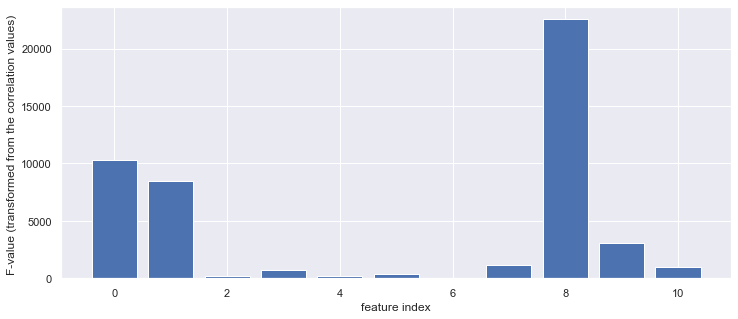

In [33]:
# feature selection  - Method 1
f_selector = SelectKBest(score_func=f_regression, k='all')

# Learn relationship from training data 
f_selector.fit(X_train, y_train)

# transform train input data
X_train_fs = f_selector. transform(X_train)

# transform test input data
X_test_fs = f_selector. transform(X_test)

# Plot the scores for the features 
plt.bar([i for i in range(len(f_selector. scores_ ) )], f_selector. scores_ ) 
plt.xlabel("feature index") 
plt.ylabel("F-value (transformed from the correlation values) ") 
plt.show()


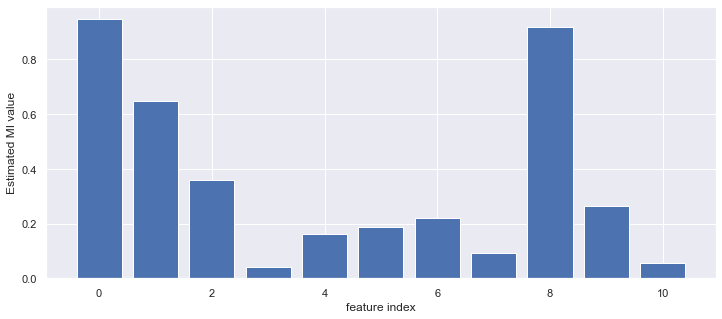

In [34]:
from sklearn.feature_selection import mutual_info_regression

# feature selection - Method 2
f_selector = SelectKBest (score_func=mutual_info_regression, k='all' )

# Learn relationship from training data 
f_selector. fit(X_train, y_train)

# transform train input data
X_train_fs = f_selector. transform(X_train)

# transform test input data
X_test_fs = f_selector. transform(X_test)

# Plot the scores for the features 
plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_) 
plt.xlabel("feature index") 
plt.ylabel("Estimated MI value") 
plt. show()


In [36]:
# From feature importance measures; features 'Displ','Cyl','Trans','Greenhouse Gas Score','SmartWay' are the least important, so we will remove those
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 

regression_dataset_X = regression_dataset_X. loc[ : , [ 'Displ' , 'Cyl', 'Trans', 'Greenhouse Gas Score', 'SmartWay' ]]


# Split dataset into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(regression_dataset_X, regression_dataset_y)

X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [37]:
# Grid Search function:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
from sklearn.model_selection import GridSearchCV 

def regression_eval(algorithm, grid_params, X_train, X_test, y_train, y_test): 
    model = GridSearchCV(algorithm, grid_params, cv=5, n_jobs =- 1, verbose=1) 
    model. fit(X_train, y_train) 
    y_pred = model. predict(X_test) 
    print("R2: \t", r2_score(y_test, y_pred)) 
    print("MSE: \t", mean_squared_error (y_test, y_pred) ) 
    print("Grid Search Best Score: \t", model.best_score_) 
    print("Grid Search Best Params; \t", model. best_params_) 
    return model


### Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression 
regression_eval(LinearRegression( ), {}, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
R2: At 0.5589519880999545
MSE: 	 28.986853931498217
Grid Search Best Score: 	 0.536851683234232
Grid Search Best Params; 	 {}


GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1, param_grid={},
             verbose=1)

### SVR

In [43]:
from sklearn.svm import SVR 
grid_params = {'C': [0.5, 1], 'kernel' : [ 'rbf' ], 'gamma' : ['scale']} 
regression_eval (SVR(), grid_params, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
R2: At 0.69577364869766
MSE: 	 19.994568775682723
Grid Search Best Score: 	 0.6579229604412508
Grid Search Best Params; 	 {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.5, 1], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf']},
             verbose=1)

### Decision Tree

In [45]:
from sklearn.tree import DecisionTreeRegressor
grid_params = {'max_depth':[1,5,10], 'min_samples_leaf' : [1,5,10]} 
regression_eval(DecisionTreeRegressor(),grid_params, X_train, X_test, y_train, y_test)  

Fitting 5 folds for each of 9 candidates, totalling 45 fits
R2: At 0.7487588698003453
MSE: 	 16.512238455192012
Grid Search Best Score: 	 0.7528771775985201
Grid Search Best Params; 	 {'max_depth': 10, 'min_samples_leaf': 10}


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10],
                         'min_samples_leaf': [1, 5, 10]},
             verbose=1)

### Random Forest



In [46]:
from sklearn.ensemble import RandomForestRegressor 
grid_params = {'n_estimators' : [10,50, 100], 'max_depth' : [1,5,10], 'min_samples_leaf' : [1,5,10]} 
regression_eval(RandomForestRegressor(), grid_params, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
R2: At 0.7468190668446201
MSE: 	 16.639727489075785
Grid Search Best Score: 	 0.7592982513938891
Grid Search Best Params; 	 {'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 10}


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10],
                         'min_samples_leaf': [1, 5, 10],
                         'n_estimators': [10, 50, 100]},
             verbose=1)